In [2]:
import math
import random
from typing import List, Tuple
import folium

# Type aliases
Coordinate = Tuple[float, float]
Route = List[Coordinate]

# Constants
EARTH_RADIUS = 6371  # km

def haversine_distance(coord1: Coordinate, coord2: Coordinate) -> float:
    """Calculate the great circle distance between two points on the earth."""
    lat1, lon1 = math.radians(coord1[0]), math.radians(coord1[1])
    lat2, lon2 = math.radians(coord2[0]), math.radians(coord2[1])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))

    return EARTH_RADIUS * c

def generate_routes(start: Coordinate, end: Coordinate, num_routes: int = 5) -> List[Route]:
    """Generate multiple routes between start and end points."""
    routes = []
    for _ in range(num_routes):
        num_waypoints = random.randint(2, 5)
        route = [start]
        for _ in range(num_waypoints):
            lat = start[0] + (end[0] - start[0]) * random.random()
            lon = start[1] + (end[1] - start[1]) * random.random()
            route.append((lat, lon))
        route.append(end)
        routes.append(route)
    return routes

def calculate_route_distance(route: Route) -> float:
    """Calculate the total distance of a route."""
    return sum(haversine_distance(route[i], route[i+1]) for i in range(len(route)-1))

def assess_weather_safety(route: Route) -> float:
    """Simulate weather safety assessment."""
    # In a real implementation, this would call a weather API
    return random.uniform(0.5, 1.0)

def optimize_route(routes: List[Route], ship_type: str, cargo_type: str) -> Tuple[Route, float, float, float]:
    """Find the optimal route based on distance, time, and safety."""
    best_route = None
    best_score = float('inf')

    for route in routes:
        distance = calculate_route_distance(route)
        safety = assess_weather_safety(route)

        # Simplified time calculation (assumes constant speed)
        speed = 20  # knots
        time = distance / (speed * 1.852)  # Convert knots to km/h

        # Score is a combination of distance, time, and safety
        # Lower score is better
        score = distance * (2 - safety) / time

        if score < best_score:
            best_score = score
            best_route = route
            best_distance = distance
            best_time = time
            best_safety = safety

    return best_route, best_distance, best_time, best_safety

def visualize_route_on_map(route: Route, start: Coordinate, end: Coordinate, filename: str = "optimal_route_map.html"):
    """Visualize the route on an interactive map using Leaflet."""
    # Create a map centered on the midpoint of the route
    center_lat = (start[0] + end[0]) / 2
    center_lon = (start[1] + end[1]) / 2
    m = folium.Map(location=[center_lat, center_lon], zoom_start=4)

    # Add markers for start and end points
    folium.Marker(start, popup="Start", icon=folium.Icon(color='green')).add_to(m)
    folium.Marker(end, popup="End", icon=folium.Icon(color='red')).add_to(m)

    # Add the route as a PolyLine
    folium.PolyLine(route, weight=2, color='blue', opacity=0.8).add_to(m)

    # Save the map
    m.save(filename)
    print(f"Map saved as {filename}")

def get_coordinate_input(prompt: str) -> Coordinate:
    """Get coordinate input from the user."""
    while True:
        try:
            input_str = input(prompt)
            lat, lon = map(float, input_str.split(','))
            if -90 <= lat <= 90 and -180 <= lon <= 180:
                return (lat, lon)
            else:
                print("Invalid coordinates. Latitude must be between -90 and 90, longitude between -180 and 180.")
        except ValueError:
            print("Invalid input. Please enter latitude and longitude as two comma-separated numbers.")

def get_cargo_type() -> str:
    """Get cargo type input from the user."""
    valid_types = ['solid', 'liquid', 'gas']
    while True:
        cargo_type = input("Enter the type of cargo (solid/liquid/gas): ").lower()
        if cargo_type in valid_types:
            return cargo_type
        else:
            print("Invalid cargo type. Please enter 'solid', 'liquid', or 'gas'.")

def main():
    # Get user input
    print("Please enter coordinates as latitude,longitude (e.g., 40.7128,-74.0060)")
    start = get_coordinate_input("Enter the source location: ")
    end = get_coordinate_input("Enter the destination location: ")
    cargo_type = get_cargo_type()

    ship_type = "cargo"  # This could also be user input if needed

    # Generate routes
    routes = generate_routes(start, end)

    # Optimize
    best_route, distance, time, safety = optimize_route(routes, ship_type, cargo_type)

    # Output results
    print(f"\nOptimal Route: {best_route}")
    print(f"Distance: {distance:.2f} km")
    print(f"Estimated Time: {time:.2f} hours")
    print(f"Safety Score: {safety:.2f}")

    # Visualize on map
    visualize_route_on_map(best_route, start, end)

if __name__ == "__main__":
    main()

Please enter coordinates as latitude,longitude (e.g., 40.7128,-74.0060)
Enter the source location: 40.7128,-74.0060
Enter the destination location: 51.5074, -0.1278
Enter the type of cargo (solid/liquid/gas): solid

Optimal Route: [(40.7128, -74.006), (46.71852599162448, -63.384812335405904), (46.5034867306278, -49.556056436952886), (51.5074, -0.1278)]
Distance: 5715.23 km
Estimated Time: 154.30 hours
Safety Score: 0.89
Map saved as optimal_route_map.html


Optimal Route: [(40.7128, -74.006), (44.26057651363128, -37.71258003629966), (42.66972151119611, -5.187543719873162), (45.86829378673799, -15.62004066681461), (40.78044466486713, -7.706331964581139), (49.55186171993701, -7.036605979181701), (51.5074, -0.1278)]
Distance: 8858.41 km
Estimated Time: 239.16 hours
Safety Score: 0.94


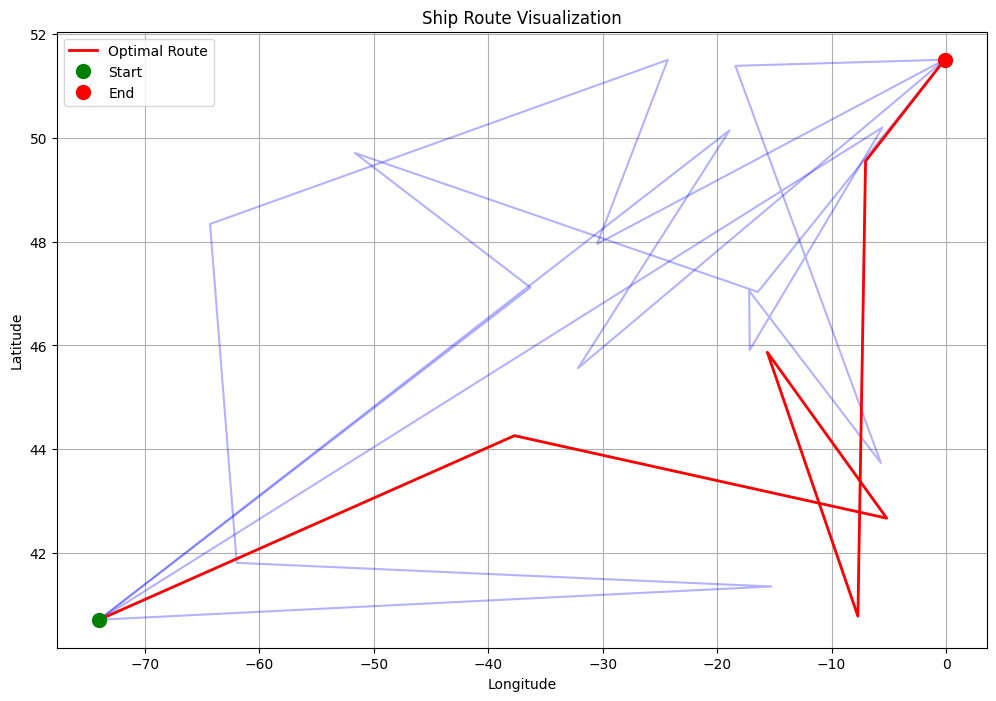

In [ ]:
import math
import random
from typing import List, Tuple
import matplotlib.pyplot as plt

# Type aliases
Coordinate = Tuple[float, float]
Route = List[Coordinate]

# Constants
EARTH_RADIUS = 6371  # km

def haversine_distance(coord1: Coordinate, coord2: Coordinate) -> float:
    """Calculate the great circle distance between two points on the earth."""
    lat1, lon1 = math.radians(coord1[0]), math.radians(coord1[1])
    lat2, lon2 = math.radians(coord2[0]), math.radians(coord2[1])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))

    return EARTH_RADIUS * c

def generate_routes(start: Coordinate, end: Coordinate, num_routes: int = 5) -> List[Route]:
    """Generate multiple routes between start and end points."""
    routes = []
    for _ in range(num_routes):
        num_waypoints = random.randint(2, 5)
        route = [start]
        for _ in range(num_waypoints):
            lat = start[0] + (end[0] - start[0]) * random.random()
            lon = start[1] + (end[1] - start[1]) * random.random()
            route.append((lat, lon))
        route.append(end)
        routes.append(route)
    return routes

def calculate_route_distance(route: Route) -> float:
    """Calculate the total distance of a route."""
    return sum(haversine_distance(route[i], route[i+1]) for i in range(len(route)-1))

def assess_weather_safety(route: Route) -> float:
    """Simulate weather safety assessment."""
    return random.uniform(0.5, 1.0)

def optimize_route(routes: List[Route], ship_type: str, cargo_type: str) -> Tuple[Route, float, float, float]:
    """Find the optimal route based on distance, time, and safety."""
    best_route = None
    best_score = float('inf')

    for route in routes:
        distance = calculate_route_distance(route)
        safety = assess_weather_safety(route)

        speed = 20  # knots
        time = distance / (speed * 1.852)  # Convert knots to km/h

        score = distance * (2 - safety) / time

        if score < best_score:
            best_score = score
            best_route = route
            best_distance = distance
            best_time = time
            best_safety = safety

    return best_route, best_distance, best_time, best_safety

def visualize_routes(routes: List[Route], best_route: Route, start: Coordinate, end: Coordinate):
    """Visualize all routes and highlight the optimal route."""
    plt.figure(figsize=(12, 8))

    # Plot all routes
    for route in routes:
        lats, lons = zip(*route)
        plt.plot(lons, lats, 'b-', alpha=0.3)  # All routes in light blue

    # Highlight the best route
    best_lats, best_lons = zip(*best_route)
    plt.plot(best_lons, best_lats, 'r-', linewidth=2, label='Optimal Route')  # Optimal route in red

    # Plot start and end points
    plt.plot(start[1], start[0], 'go', markersize=10, label='Start')  # Start in green
    plt.plot(end[1], end[0], 'ro', markersize=10, label='End')  # End in red

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Ship Route Visualization')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    # Input
    start = (40.7128, -74.0060)  # New York
    end = (51.5074, -0.1278)  # London
    ship_type = "cargo"
    cargo_type = "container"

    # Generate routes
    routes = generate_routes(start, end)

    # Optimize
    best_route, distance, time, safety = optimize_route(routes, ship_type, cargo_type)

    # Output results
    print(f"Optimal Route: {best_route}")
    print(f"Distance: {distance:.2f} km")
    print(f"Estimated Time: {time:.2f} hours")
    print(f"Safety Score: {safety:.2f}")

    # Visualize
    visualize_routes(routes, best_route, start, end)

if __name__ == "__main__":
    main()


In [ ]:
pip install Pillow numpy


In [ ]:
from PIL import Image
import numpy as np
from collections import Counter

# Define a function to get the predominant color
def get_dominant_color(image_path):
    image = Image.open(r"C:\Users\Hp\Desktop\SIH 2024-25\map (2).png")
    image = image.resize((100, 100))  # Resize for faster processing
    pixels = np.array(image).reshape(-1, 3)  # Reshape to a 2D array of RGB values
    most_common_color = Counter(map(tuple, pixels)).most_common(1)[0][0]
    return most_common_color

# Define a function to interpret the color based on map conventions
def interpret_color(rgb):
    r, g, b = rgb
    # Simplified color interpretations
    if (r, g, b) == (0, 0, 255):  # Blue for water
        return "Blue: Water bodies (lakes, rivers, oceans)."
    elif (r, g, b) == (34, 139, 34):  # Forest green
        return "Green: Forests, parks, natural areas."
    elif (r, g, b) == (255, 255, 0):  # Yellow
        return "Yellow: Urban areas, roads."
    elif (r, g, b) == (139, 69, 19):  # Brown
        return "Brown: Mountains, elevation."
    elif (r, g, b) == (255, 0, 0):  # Red
        return "Red: Major roads or boundaries."
    elif (r, g, b) == (255, 255, 255):  # White
        return "White: Unmapped areas or snow."
    elif (r, g, b) == (128, 128, 128):  # Gray
        return "Gray: Built-up areas, urban infrastructure."
    else:
        return "Unknown color: Might represent something specific or mixed features."

# Main code
if __name__ == "__main__":
    image_path = 'path_to_your_map_image.jpg'  # Change this to your map image path
    dominant_color = get_dominant_color(image_path)
    color_meaning = interpret_color(dominant_color)

    print(f"Dominant Color (RGB): {dominant_color}")
    print(f"Meaning: {color_meaning}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/C:\\Users\\Hp\\Desktop\\SIH 2024-25\\map (2).png'